# Milestone 1 : Requirements & Data Preparation


### Brief about dataset
This dataset contains dynamic pricing ride-share data.
Key columns:
- Number_of_Riders, Number_of_Drivers: depending on supply/demand
- Location_Category: {Urban, Suburban, Rural} (categorical)
- Customer_Loyalty_Status: {Gold, Silver, Regular} (ordinal)
- Number_of_Past_Rides: historical customer engagement
- Average_Ratings: driver/rider ratings (0–5)
- Time_of_Booking: categorical (Morning, Afternoon, Evening, Night)
- Vehicle_Type: {Economy, Premium}
- Expected_Ride_Duration: in minutes
- Historical_Cost_of_Ride: target numeric price (continuous)
- 
Use-cases: price elasticity analysis, revenue optimization, segmentation by loyalty and location.


In [32]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [33]:
import pandas as pd

In [34]:
df=pd.read_csv("dynamic_pricing.csv")
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [35]:
#1 a) Missing values
df.isnull().sum() 


Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

In [36]:
# Advanced EDA: duplicates 


# 1) Duplicates
print("Number of duplicate rows:", df.duplicated().sum())
# optionally drop duplicates for cleaned dataset later:
# df = df.drop_duplicates()

# 2) Data types and missing summary
print("\nData types:\n", df.dtypes)
print("\nBasic info:")
display(df.describe(include='all').T)

# 3) Sanity checks for logical inconsistencies
inconsistencies = {}
inconsistencies['negative_riders'] = df[df['Number_of_Riders'] < 0].shape[0]
inconsistencies['negative_drivers'] = df[df['Number_of_Drivers'] < 0].shape[0]
inconsistencies['rating_out_of_range'] = df[(df['Average_Ratings'] < 0) | (df['Average_Ratings'] > 5)].shape[0]
inconsistencies['duration_negative'] = df[df['Expected_Ride_Duration'] <= 0].shape[0]

print("\nSanity inconsistency counts:", inconsistencies)


Number of duplicate rows: 0

Data types:
 Number_of_Riders             int64
Number_of_Drivers            int64
Location_Category           object
Customer_Loyalty_Status     object
Number_of_Past_Rides         int64
Average_Ratings            float64
Time_of_Booking             object
Vehicle_Type                object
Expected_Ride_Duration       int64
Historical_Cost_of_Ride    float64
dtype: object

Basic info:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Number_of_Riders,1000.0,NaN,NaN,NaN,60.372,23.701506,20.0,40.0,60.0,81.0,100.0
Number_of_Drivers,1000.0,NaN,NaN,NaN,27.076,19.068346,5.0,11.0,22.0,38.0,89.0
Location_Category,1000,3,Urban,346,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer_Loyalty_Status,1000,3,Silver,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number_of_Past_Rides,1000.0,NaN,NaN,NaN,50.031,29.313774,0.0,25.0,51.0,75.0,100.0
Average_Ratings,1000.0,NaN,NaN,NaN,4.25722,0.435781,3.5,3.87,4.27,4.6325,5.0
Time_of_Booking,1000,4,Night,276,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vehicle_Type,1000,2,Premium,522,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Expected_Ride_Duration,1000.0,NaN,NaN,NaN,99.588,49.16545,10.0,59.75,102.0,143.0,180.0
Historical_Cost_of_Ride,1000.0,NaN,NaN,NaN,372.502623,187.158756,25.993449,221.365202,362.019426,510.497504,836.116419



Sanity inconsistency counts: {'negative_riders': 0, 'negative_drivers': 0, 'rating_out_of_range': 0, 'duration_negative': 0}


In [37]:
#1. b) Duplicate values
df.duplicated().sum()


np.int64(0)

In [38]:
#c) Handle incorrect datatypes

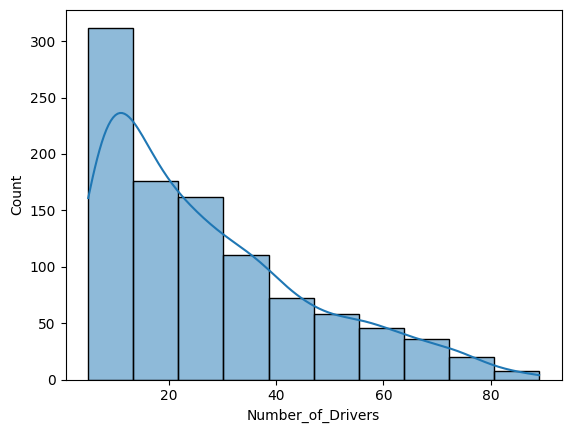

In [39]:
#2 Basic visualization
#Histogram:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df["Number_of_Drivers"], bins=10, kde=True)
plt.show()


In [40]:
#3 Check for Outliers (with & without boxplot)


In [41]:
df.shape

(1000, 10)

In [42]:
df=pd.read_csv("dynamic_pricing.csv")
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [43]:
# 2. Advanced EDA
print("\n=== Dataset Info ===")
print(df.info())

# (a) Check Null Values
print("\n=== Missing Values ===")
print(df.isnull().sum())

# (b) Check Duplicate Values
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# (c) Data Types and Consistency
print("\n=== Data Types ===")
print(df.dtypes)

# Fix categorical columns (strip spaces, consistent case)
cat_cols = ["Location_Category", "Customer_Loyalty_Status", "Time_of_Booking", "Vehicle_Type"]
for col in cat_cols:
    df[col] = df[col].astype(str).str.strip().str.title()




=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB
None

=== Missing Values ===
Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_R

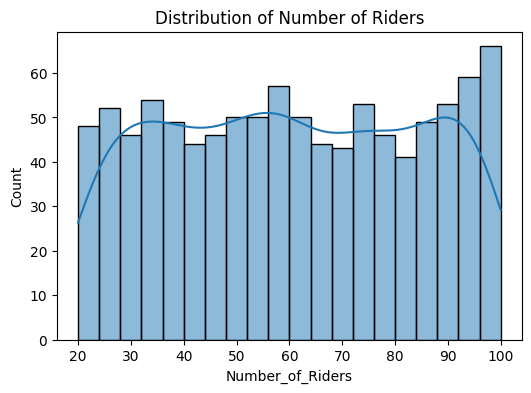

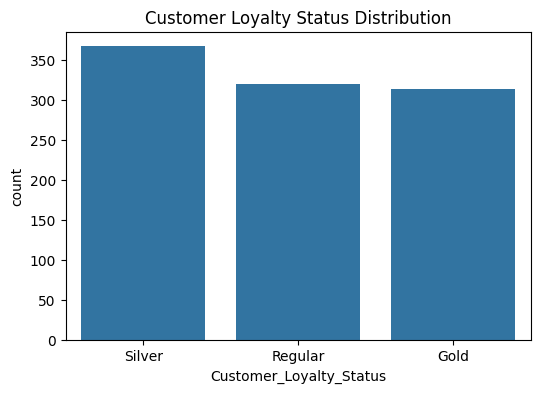

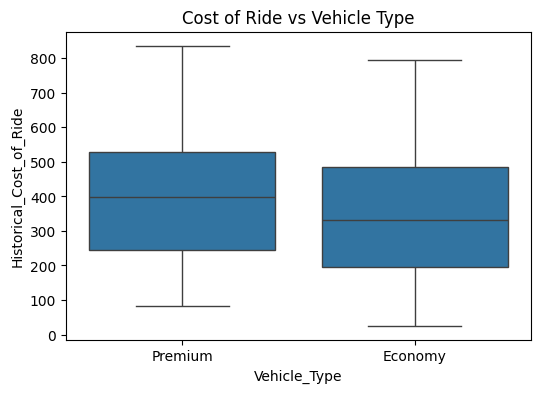

In [44]:
# 3. Basic Visualization

plt.figure(figsize=(6,4))
sns.histplot(df["Number_of_Riders"], bins=20, kde=True)
plt.title("Distribution of Number of Riders")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x="Customer_Loyalty_Status", data=df)
plt.title("Customer Loyalty Status Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x="Vehicle_Type", y="Historical_Cost_of_Ride", data=df)
plt.title("Cost of Ride vs Vehicle Type")
plt.show()



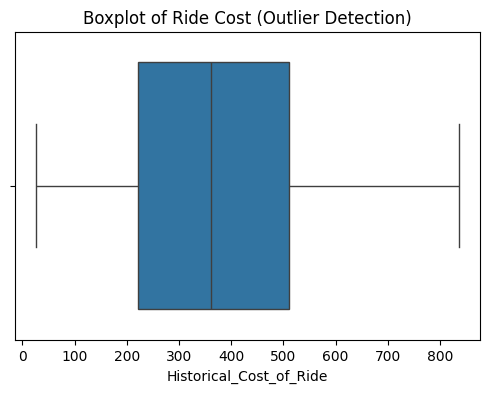


Number of outliers in Ride Cost: 0


In [45]:
# 4. Outlier Detection
# With Boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Historical_Cost_of_Ride"])
plt.title("Boxplot of Ride Cost (Outlier Detection)")
plt.show()

# Without Boxplot → Using IQR Method
Q1 = df["Historical_Cost_of_Ride"].quantile(0.25)
Q3 = df["Historical_Cost_of_Ride"].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df["Historical_Cost_of_Ride"] < Q1 - 1.5*IQR) |
              (df["Historical_Cost_of_Ride"] > Q3 + 1.5*IQR)]
print(f"\nNumber of outliers in Ride Cost: {len(outliers)}")




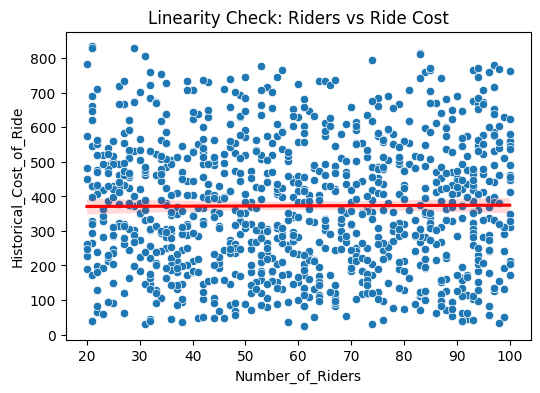

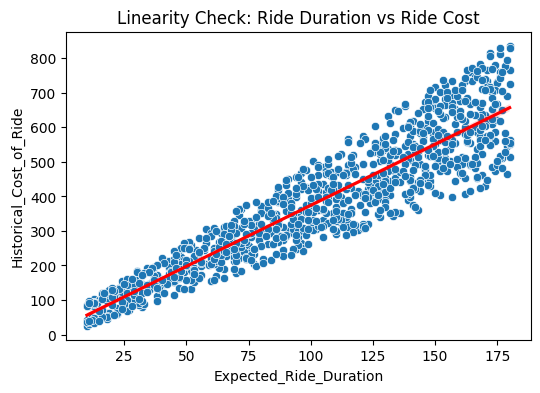

In [46]:
# 5. Linearity Check
# Scatter plots between independent vars and target
plt.figure(figsize=(6,4))
sns.scatterplot(x="Number_of_Riders", y="Historical_Cost_of_Ride", data=df)
sns.regplot(x="Number_of_Riders", y="Historical_Cost_of_Ride", data=df, scatter=False, color="red")
plt.title("Linearity Check: Riders vs Ride Cost")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x="Expected_Ride_Duration", y="Historical_Cost_of_Ride", data=df)
sns.regplot(x="Expected_Ride_Duration", y="Historical_Cost_of_Ride", data=df, scatter=False, color="red")
plt.title("Linearity Check: Ride Duration vs Ride Cost")
plt.show()


In [24]:
df.head()

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422


In [26]:
#2 Summary Statistics
# Numeric features summary
print("\n=== Summary Statistics (Numeric) ===")
print(df.describe())

# Categorical features summary (before encoding)
cat_cols = ["Location_Category", "Customer_Loyalty_Status", "Time_of_Booking", "Vehicle_Type"]
for col in cat_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())



=== Summary Statistics (Numeric) ===
       Number_of_Riders  Number_of_Drivers  Number_of_Past_Rides  \
count       1000.000000        1000.000000           1000.000000   
mean          60.372000          27.076000             50.031000   
std           23.701506          19.068346             29.313774   
min           20.000000           5.000000              0.000000   
25%           40.000000          11.000000             25.000000   
50%           60.000000          22.000000             51.000000   
75%           81.000000          38.000000             75.000000   
max          100.000000          89.000000            100.000000   

       Average_Ratings  Expected_Ride_Duration  Historical_Cost_of_Ride  
count      1000.000000              1000.00000              1000.000000  
mean          4.257220                99.58800               372.502623  
std           0.435781                49.16545               187.158756  
min           3.500000                10.00000       

In [27]:
# #3 Correlations
# # Correlation matrix
# corr = df.corr()

# # Heatmap
# plt.figure(figsize=(8,6))
# sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
# plt.title("Correlation Heatmap")
# plt.show()

# # High correlation with target
# print("\nFeatures most correlated with Historical_Cost_of_Ride:")
# print(corr["Historical_Cost_of_Ride"].sort_values(ascending=False))


In [ ]:
# Encoding categorical variables
# Loyalty status is ordinal; mapping chosen: Regular(0) < Silver(1) < Gold(2).

# 1) Ordinal mapping for loyalty
loyalty_map = {'Regular': 0, 'Silver': 1, 'Gold': 2}
df['Customer_Loyalty_Status_enc'] = df['Customer_Loyalty_Status'].map(loyalty_map)

# 2) One-Hot Encoding for nominal features (Time_of_Booking, Location_Category, Vehicle_Type)
df = pd.get_dummies(df, columns=['Location_Category', 'Time_of_Booking', 'Vehicle_Type'], drop_first=True)

print("Columns after encoding:", [c for c in df.columns if 'Location_Category' in c or 'Time_of_Booking' in c or 'Vehicle_Type' in c])


Columns after encoding: ['Location_Category_Suburban', 'Location_Category_Urban', 'Time_of_Booking_Evening', 'Time_of_Booking_Morning', 'Time_of_Booking_Night', 'Vehicle_Type_Premium']
